In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv.zip')

In [5]:
df1 = df.copy()

In [6]:
categorical_features = df.describe(include=object).columns

In [7]:
numerical_features = df1.describe(include=float).columns

In [8]:
df['RainTomorrow']

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [116]:
inf_data = [(i,index) for i,index in enumerate(df['RainTomorrow']) if pd.isna(index)]

In [117]:
y_inf = pd.DataFrame(inf_data).set_index(0)
y_inf

,1
0,
14,NaN
283,NaN
435,NaN
437,NaN
443,NaN
...,...
144955,NaN
145091,NaN
145092,NaN


In [118]:
index_of_inf = y_inf.index.tolist()

In [119]:
x_inf = df.iloc[index_of_inf]
x_inf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,2016-02-07,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,2016-06-22,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


In [42]:
df.shape[0]

145460

In [43]:
a=[]
for i in range(df.shape[0]):
  if i not in index_of_inf:
    a.append(i)

In [44]:
len(a)

142193

In [45]:
x_actual = df.iloc[a]
x_actual

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [49]:
df_act = pd.DataFrame(x_actual)

In [50]:
df_act = df_act.drop(['Date'],axis=1)

In [51]:
X_split = df_act.drop(['RainTomorrow'],axis=1) # Main data

In [55]:
X_split.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [56]:
y_split = df_act['RainTomorrow']

In [57]:
y_split

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 142193, dtype: object

In [58]:
df_act1 = X_split.copy()

In [61]:
df_act1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [62]:
df_act1.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

**Missing value Treatme**nt

In [63]:
df_act1 = df_act1.fillna(method='bfill',axis=0).fillna(method='ffill',axis=0)

In [64]:
df_act1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

**Label Encoding**

In [65]:
categorical_features

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [27]:
from sklearn import preprocessing
l_encoder = preprocessing.LabelEncoder()

In [66]:
df_act1['Location'] = l_encoder.fit_transform(df_act1['Location'])

In [67]:
df_act1['WindGustDir'] = l_encoder.fit_transform(df_act1['WindGustDir'])

In [68]:
df_act1['WindDir9am'] = l_encoder.fit_transform(df_act1['WindDir9am'])

In [69]:
df_act1['WindDir3pm'] = l_encoder.fit_transform(df_act1['WindDir3pm'])

In [70]:
df_act1['RainToday'] = l_encoder.fit_transform(df_act1['RainToday'])

In [71]:
df_act1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,12.0,12.3,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,0
1,2,7.4,25.1,0.0,12.0,12.3,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,7.0,2.0,17.2,24.3,0
2,2,12.9,25.7,0.0,12.0,12.3,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0
3,2,9.2,28.0,0.0,12.0,12.3,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,7.0,8.0,18.1,26.5,0
4,2,17.5,32.3,1.0,12.0,12.3,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


**Outliers Visualization**

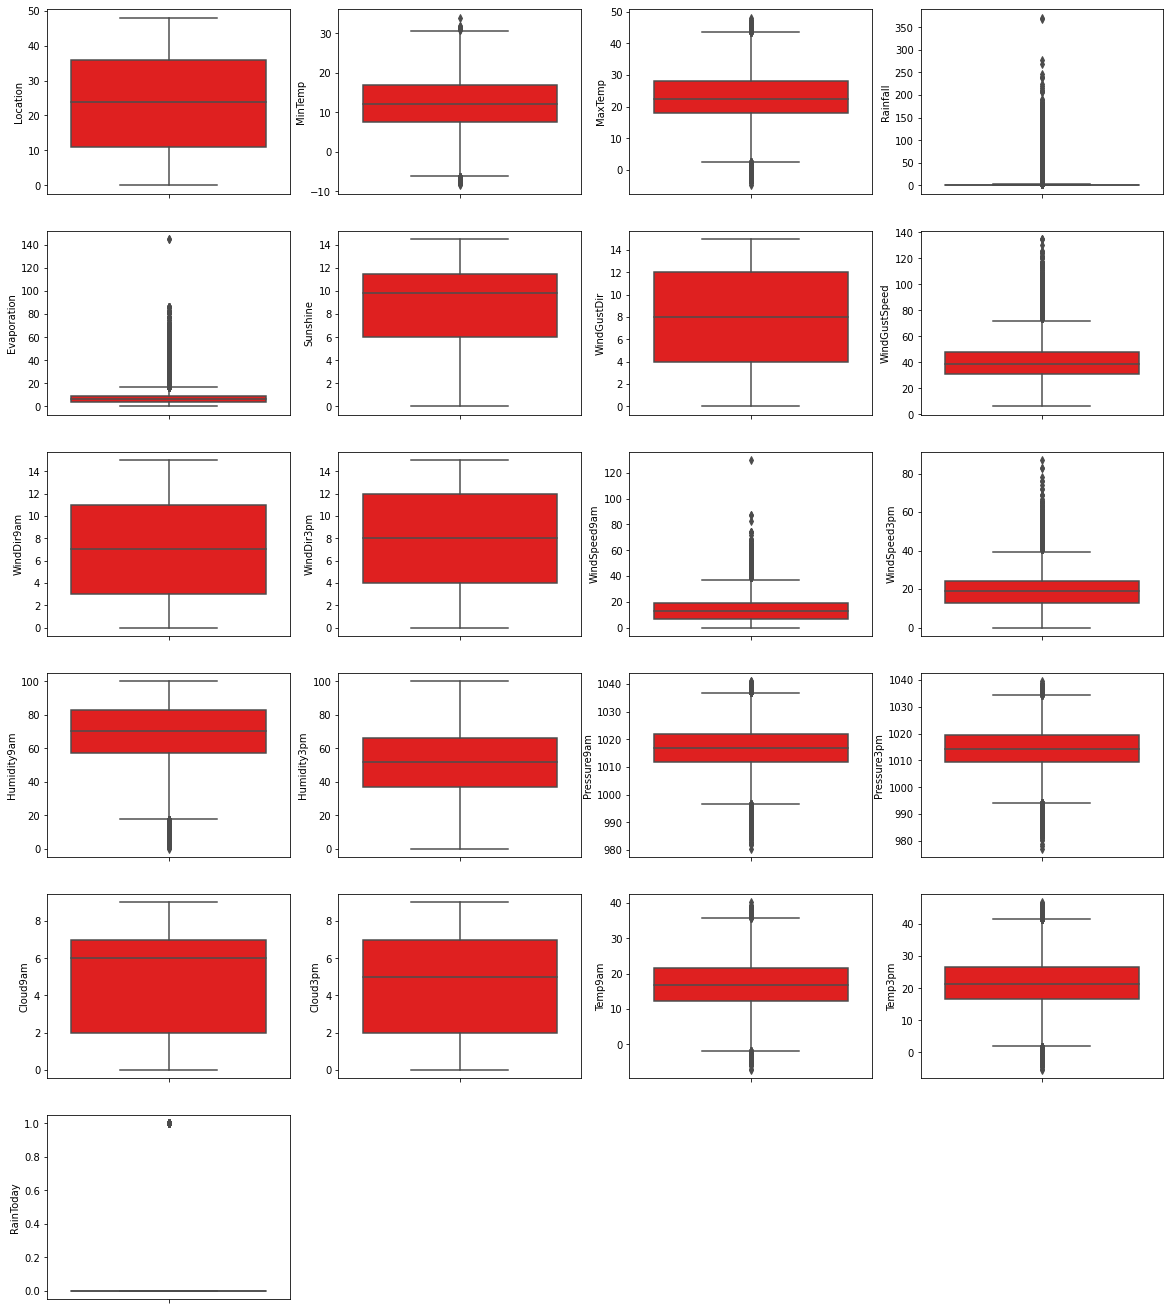

In [72]:
plt.figure(figsize=(20,40))
i=0
for col in df_act1.describe():
  i+=1
  plt.subplot(10,4,i)
  sns.boxplot(df_act1,y=df_act1[col],color='red')
plt.tight_layout
plt.show()

In [74]:
df2 = df_act1.copy()

**Features Scaling Method**

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(df2)
scaled_data = model.transform(df2)
print(scaled_data)

[[-1.5270045   0.18911965 -0.0462377  ... -0.00962269  0.00708313
  -0.54029965]
 [-1.5270045  -0.74794986  0.26286199 ...  0.03643231  0.36734324
  -0.54029965]
 [-1.5270045   0.11103052  0.3471619  ...  0.61979554  0.20882879
  -0.54029965]
 ...
 [ 1.21224943 -1.34142722  0.29096196 ... -0.93072252  0.39616405
  -0.54029965]
 [ 1.21224943 -1.06030637  0.51576173 ... -0.6850959   0.62673052
  -0.54029965]
 [ 1.21224943 -0.68547856  0.52981172 ... -0.28595264  0.61232012
  -0.54029965]]


In [76]:
df_mod = pd.DataFrame(df2)

In [77]:
X = df_mod
y = y_split

In [78]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [79]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 21), (28439, 21))

**Model training**

In [80]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

**Predict results**

In [81]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [91]:
y_pred_train_df = pd.DataFrame(y_pred_train)

In [92]:
y_pred_train_df.head(20)

,0
0,No
1,No
2,No
3,No
4,No
5,Yes
6,No
7,No
8,No
9,No


In [82]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

**Predict_proba method**

predict_proba method gives the probabilities for the target variable('no' and 'yes') in this case, in array form.

 is for probability of no rain and 1 is for probability of rain.

In [85]:
# probability of getting output as 'no' - no rain

logreg.predict_proba(X_test)[:,0]

array([0.87231678, 0.92108116, 0.82654884, ..., 0.97568297, 0.7834226 ,
       0.31857381])

In [86]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.12768322, 0.07891884, 0.17345116, ..., 0.02431703, 0.2165774 ,
       0.68142619])

**Check accuracy score**

In [87]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8411


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

**Compare the train-set and test-set accuracy**

In [88]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [89]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8382


**Check for overfitting and underfitti**ng

In [90]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8382
Test set score: 0.8411


**Confusion matrix**

A confusion matrix is a tool for **summarizing the performance** of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

**Four types of outcomes** are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation **belongs to a certain class** and the observation actually **belongs to that class.**

**True Negatives (TN)** – True Negatives occur when we predict an observation *does not belong to* a certain class **bold text** and the observation **actually does not belong to that class.**

**False Positives (FP)** – False Positives occur when we predict an observation ***belongs to a certain class*** but the observation actually ***does not belong to that class.*** This type of error is called **Type I error**.

**False Negatives (FN)** – False Negatives occur when we predict an observation **does not belong to a certain class** but the observation **actually belongs to that class.** This is a very serious error and it is called **Type II error.**

These four outcomes are summarized in a confusion matrix given below.

In [93]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20883  1184]
 [ 3336  3036]]

True Positives(TP) =  20883

True Negatives(TN) =  3036

False Positives(FP) =  1184

False Negatives(FN) =  3336




Confusion matrix

 [[20892  1175]
 [ 3086  3286]]

True Positives(TP) =  20892

True Negatives(TN) =  3286

False Positives(FP) =  1175

False Negatives(FN) =  3086

The confusion matrix shows 20892 + 3285 = 24177 correct predictions and 3087 + 1175 = 4262 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 20892

True Negatives (Actual Negative:0 and Predict Negative:0) - 3285

False Positives (Actual Negative:0 but Predict Positive:1) - 1175 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 3087 (Type II error)


<Axes: >

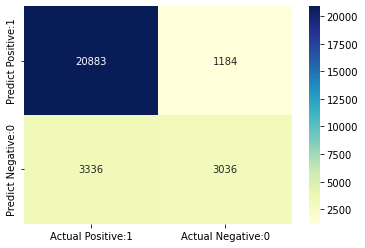

In [94]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
     


# **Classification metrices**

**Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22067
         Yes       0.72      0.48      0.57      6372

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



**Classification accuracy**

In [99]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [100]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8411


**Classification error**

In [101]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1589


**Precision**

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).


In [102]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9463


**Recall**

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).


In [103]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8623


**True Positive Rate**

True Positive Rate is synonymous with Recall.


In [104]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8623


**False Positive Rate**

In [105]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2806


**Specificity**

In [106]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7194


**f1-score**

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

**Support**

Support is the actual number of occurrences of the class in our dataset.

**Adjusting the threshold level**

In [107]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.87231678, 0.12768322],
       [0.92108116, 0.07891884],
       [0.82654884, 0.17345116],
       [0.98345864, 0.01654136],
       [0.90101536, 0.09898464],
       [0.94749292, 0.05250708],
       [0.21081023, 0.78918977],
       [0.22119018, 0.77880982],
       [0.92236644, 0.07763356],
       [0.8720281 , 0.1279719 ]])


**Observations**

In each row, the numbers sum to 1.

    There are 2 columns which correspond to 2 classes - 0 and 1.

Class 0 - predicted probability that there is no rain tomorrow.

Class 1 - predicted probability that there is rain tomorrow.

    Importance of predicted probabilities

We can rank the observations by probability of rain or no rain.

    predict_proba process

Predicts the probabilities

Choose the class with the highest probability

    Classification threshold level:

There is a classification threshold level of 0.5.

Class 1 - probability of rain is predicted if probability > 0.5.

Class 0 - probability of no rain is predicted if probability < 0.5.


In [108]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.872317,0.127683
1,0.921081,0.078919
2,0.826549,0.173451
3,0.983459,0.016541
4,0.901015,0.098985
5,0.947493,0.052507
6,0.210810,0.789190
7,0.221190,0.778810
8,0.922366,0.077634
9,0.872028,0.127972


**For inferential data**

In [120]:
x_inf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN


In [121]:
y_inf

,1
0,
14,NaN
283,NaN
435,NaN
437,NaN
443,NaN
...,...
144955,NaN
145091,NaN
145092,NaN


In [123]:
x_inf = x_inf.drop(['Date'],axis=1)

In [124]:
x_infc = x_inf.copy()

# **Label Encoding on categorical features**

In [127]:
categorical_features

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [128]:
x_infc['Location'] = l_encoder.fit_transform(x_infc['Location'])

In [129]:
x_infc['WindGustDir'] = l_encoder.fit_transform(x_infc['WindGustDir'])

In [130]:
x_infc['WindDir9am'] = l_encoder.fit_transform(x_infc['WindDir9am'])

In [131]:
x_infc['WindDir3pm'] = l_encoder.fit_transform(x_infc['WindDir3pm'])

In [132]:
x_infc['RainToday'] = l_encoder.fit_transform(x_infc['RainToday'])

In [139]:
x_infM = x_infc.fillna(method='bfill',axis=0).fillna(method='ffill',axis=0)

In [138]:
x_infM

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2,8.4,24.6,0.0,6.4,0.0,16,28.0,8,14,...,57.0,32.0,1009.7,1008.7,6.0,6.0,15.9,23.5,0,NaN
283,2,2.6,35.1,0.0,6.4,0.0,16,28.0,0,14,...,71.0,55.0,1017.8,1017.6,6.0,6.0,9.7,14.3,0,NaN
435,2,22.1,35.1,0.0,6.4,0.0,16,28.0,1,12,...,58.0,37.0,1020.9,1017.8,6.0,1.0,26.9,33.5,0,NaN
437,2,21.5,35.0,0.0,6.4,0.0,16,28.0,10,0,...,76.0,35.0,1015.8,1010.3,6.0,8.0,24.2,33.1,0,NaN
443,2,15.5,30.6,0.0,6.4,0.0,16,28.0,9,11,...,66.0,30.0,1015.9,1013.8,6.0,1.0,19.4,30.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,38,22.5,37.7,0.0,10.0,8.8,9,50.0,9,2,...,22.0,11.0,1012.6,1009.6,8.0,8.0,28.8,37.2,0,NaN
145091,38,12.3,19.1,0.0,10.0,8.8,16,50.0,16,16,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,0,NaN
145092,38,14.2,18.7,0.0,10.0,8.8,16,50.0,13,16,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,2,NaN
145335,38,13.5,18.7,0.0,10.0,8.8,16,50.0,1,12,...,23.0,11.0,1013.7,1008.4,8.0,8.0,25.2,34.4,0,NaN


In [140]:
x_infM1 = x_infM.drop(['RainTomorrow'],axis=1)

# **Scaling the features**

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model1 = scaler.fit(x_infM1)
scaled_data1 = model1.transform(x_infM1)
print(scaled_data1)

[[-1.83604947 -0.37644162  0.42089382 ...  0.06989278  0.49797963
  -1.41568169]
 [-1.83604947 -1.22707146  1.92729804 ... -0.84064631 -0.86315775
  -1.41568169]
 [-1.83604947  1.63280473  1.92729804 ...  1.68536535  1.97747677
  -1.41568169]
 ...
 [ 1.05504262  0.47418823 -0.42556188 ...  0.17269558 -0.38971866
   0.82133504]
 [ 1.05504262  0.371526   -0.42556188 ...  1.43570141  2.11063152
  -1.41568169]
 [ 1.05504262  0.57685045 -0.42556188 ... -0.06228225  0.11331037
  -1.41568169]]


In [142]:
x_infS = pd.DataFrame(scaled_data1)

In [143]:
x_infS.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.836049,-0.376442,0.420894,-0.37223,0.232543,-1.852555,1.041038,-0.911285,-0.223650,0.968545,...,1.174040,-0.967107,-1.004002,-1.233469,-1.088440,0.415128,0.564497,0.069893,0.497980,-1.415682
1,-1.836049,-1.227071,1.927298,-0.37223,0.232543,-1.852555,1.041038,-0.911285,-1.758660,0.968545,...,-0.668638,-0.153482,0.080009,-0.096915,0.220424,0.415128,0.564497,-0.840646,-0.863158,-1.415682
2,-1.836049,1.632805,1.927298,-0.37223,0.232543,-1.852555,1.041038,-0.911285,-1.566784,0.563782,...,-0.885424,-0.908991,-0.768348,0.338062,0.249837,0.415128,-1.376370,1.685365,1.977477,-1.415682
3,-1.836049,1.544809,1.912951,-0.37223,0.232543,-1.852555,1.041038,-0.911285,0.160102,-1.864798,...,-1.318995,0.137098,-0.862610,-0.377546,-0.853138,0.415128,1.340844,1.288840,1.918297,-1.415682
4,-1.836049,0.664847,1.281696,-0.37223,0.232543,-1.852555,1.041038,-0.911285,-0.031774,0.361400,...,-0.885424,-0.444062,-1.098264,-0.363514,-0.338417,0.415128,-1.376370,0.583907,1.459653,-1.415682


In [144]:
X1 = x_infS
y1 = y_inf

In [145]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [146]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [148]:
y_pred_train1 = logreg.predict(X_train1)

y_pred_train1

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [150]:
len(y_pred_train1)

2613

In [149]:
y_pred_test1 = logreg.predict(X_test1)

y_pred_test1

array(['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Ye

In [151]:
len(y_pred_test1)

654